# Spots and A(Li)

Exploring the impact of short-timescale spots on observed lithium abundances.

Start with some preliminaries.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cd /Users/grefe950/Projects/starspot/models/age_120.0+z_0.00/sts/

/Users/grefe950/Projects/starspot/models/age_120.0+z_0.00/sts


Define a reusable isochrone loader that also trims the fat from the isochrone.

In [3]:
# routine to load a compressed isochrones
def loadIsochrone(filename):
    iso = np.genfromtxt(filename)
    bools = [x[0] < 1.65 for x in iso]
    return np.compress(bools, iso, axis=0)

Lithium abundances are typically compared against either inferred stellar "effective" temperatures or against stellar bolometric luminosities. We'll begin with the "effective" temperature, which is taken to be the average surface temperature (as would presumably be derived from colors or SED fitting).

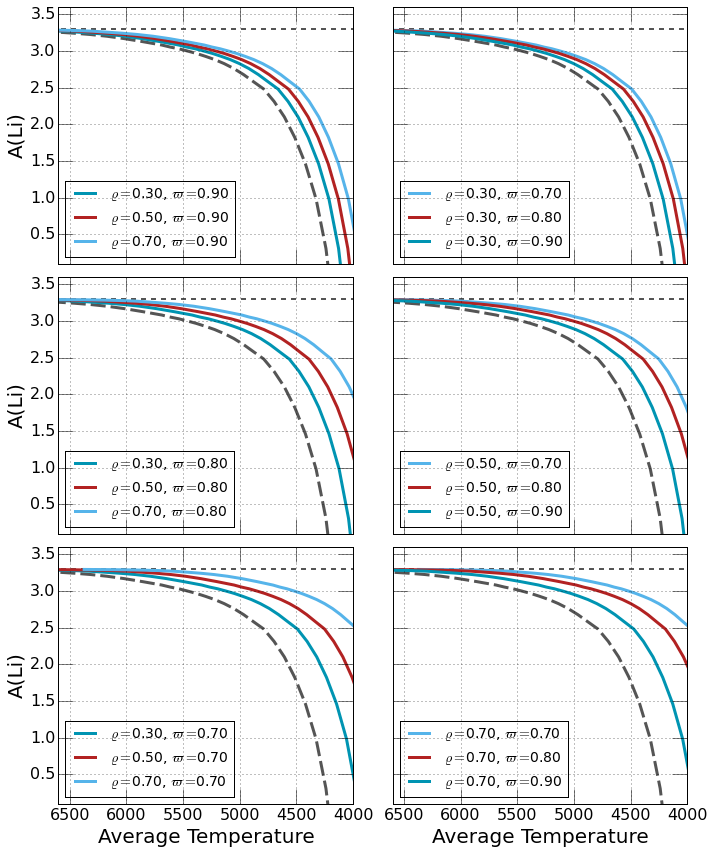

In [4]:
#colors = {0: '#1F7676', 1:'#0473B3', 2: '#A21616', 3:'#555555'}
colors = {2:'#0094b2', 1:'#B22222', 0:'#56b4ea', 3:'#555555'}
varpi  = np.array([0.7, 0.8, 0.9])
varrho = np.array([0.3, 0.5, 0.7])

fig, ax = plt.subplots(3, 2, figsize=(10., 12.), sharex=True, sharey=True)
    
# set x-axis labels
for i in range(2):
    ax[2, i].set_xlim(6600., 4000.)
    ax[2, i].set_ylim(0.1, 3.6)
    ax[2, i].set_xlabel('Average Temperature', fontsize=20.)

# load standard isochrone
iso = loadIsochrone('../isochrone_120.0myr_z+0.00_a+0.00_marcs.iso')

# initial Li abundance
Li_init = np.array([[3000., 3.3], [8000., 3.3]])

# left column, vary rho
for i in range(3):
    ax[i, 0].tick_params(which='major', axis='both', length=15., labelsize=16.)
    ax[i, 0].set_ylabel('A(Li)', fontsize=20.)
    
    ax[i, 0].plot(10**iso[:,1], iso[:,5], lw=3, dashes=(15., 5.), c=colors[3])
    ax[i, 0].plot(Li_init[:,0], Li_init[:,1], lw=2, dashes=(5.0, 5.0), c=colors[3])
    
    # compute zeta for (varpi, varrho); plot spotted isochrone
    zeta   = 1.0 - varrho*(1.0 - varpi[2-i]**4)
    for j in range(len(zeta)):
        filename = 'mag_zet{:+4.2f}_eps+1.00_rho{:+4.2f}_pi{:+4.2f}.dat'.format(zeta[j], varrho[j], varpi[2-i])
        line = '$\\varrho = ${:4.2f}, $\\varpi = ${:4.2f}'.format(varrho[j], varpi[2-i])
        spot_iso = loadIsochrone(filename)
        ax[i, 0].plot(10**spot_iso[:, 1], spot_iso[:, 5], lw=3, c=colors[2-j], label=line)
        
    ax[i, 0].legend(loc=3, fontsize=14.)
    ax[i, 0].grid(True)

# left column, vary varpi
for i in range(3):
    ax[i, 1].tick_params(which='major', axis='both', length=15., labelsize=16.)    
    ax[i, 1].plot(10**iso[:,1], iso[:,5], lw=3, dashes=(15., 5.), c=colors[3])
    ax[i, 1].plot(Li_init[:,0], Li_init[:,1], lw=2, dashes=(5.0, 5.0), c=colors[3])
    
    # compute zeta for (varpi, varrho); plot spotted isochrone
    zeta   = 1.0 - varrho[i]*(1.0 - varpi**4)
    for j in range(len(zeta)):
        filename = 'mag_zet{:+4.2f}_eps+1.00_rho{:+4.2f}_pi{:+4.2f}.dat'.format(zeta[j], varrho[i], varpi[j])
        line = '$\\varrho = ${:4.2f}, $\\varpi = ${:4.2f}'.format(varrho[i], varpi[j])
        spot_iso = loadIsochrone(filename)
        ax[i, 1].plot(10**spot_iso[:, 1], spot_iso[:, 5], lw=3, c=colors[j], label=line)
        
    ax[i, 1].legend(loc=3, fontsize=14.)
    ax[i, 1].grid(True)
    
fig.tight_layout()

And now stellar bolometric luminosity.

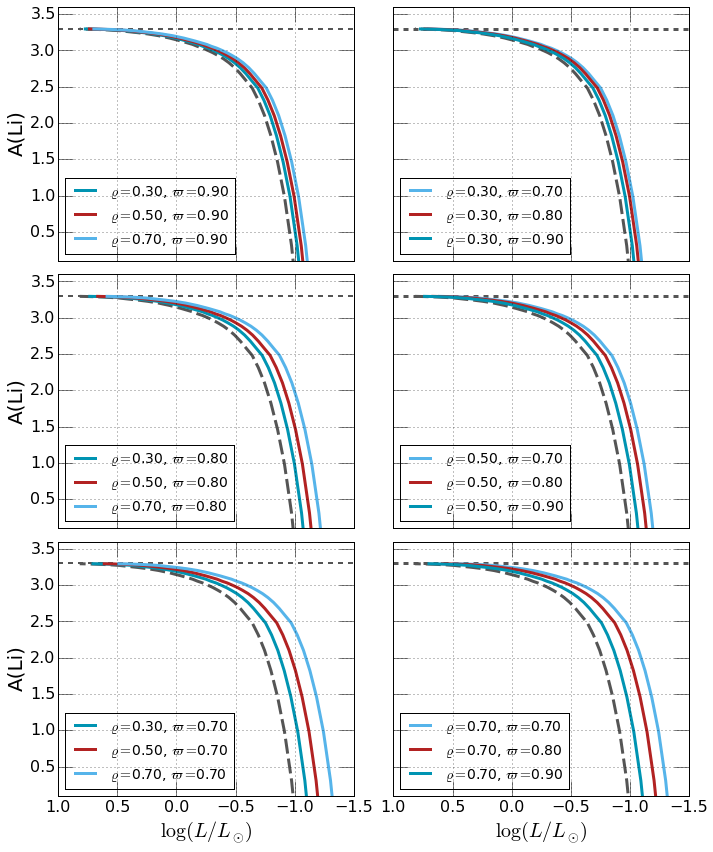

In [5]:
fig, ax = plt.subplots(3, 2, figsize=(10., 12.), sharex=True, sharey=True)
    
# set x-axis labels
for i in range(2):
    ax[2, i].set_xlim(1., -1.5)
    ax[2, i].set_ylim(0.1, 3.6)
    ax[2, i].set_xlabel('$\\log (L/L_{\\odot})$', fontsize=20.)

# load standard isochrone
iso = loadIsochrone('../isochrone_120.0myr_z+0.00_a+0.00_marcs.iso')

# initial Li abundance
Li_init = np.array([[1., 3.3], [-3., 3.3]])

# left column, vary rho
for i in range(3):
    ax[i, 0].tick_params(which='major', axis='both', length=15., labelsize=16.)
    ax[i, 0].set_ylabel('A(Li)', fontsize=20.)
    
    ax[i, 0].plot(iso[:,3], iso[:,5], lw=3, dashes=(15., 5.), c=colors[3])
    ax[i, 0].plot(Li_init[:,0], Li_init[:,1], lw=2, dashes=(5.0, 5.0), c=colors[3])
    
    # compute zeta for (varpi, varrho); plot spotted isochrone
    zeta   = 1.0 - varrho*(1.0 - varpi[2-i]**4)
    for j in range(len(zeta)):
        filename = 'mag_zet{:+4.2f}_eps+1.00_rho{:+4.2f}_pi{:+4.2f}.dat'.format(zeta[j], varrho[j], varpi[2-i])
        line = '$\\varrho = ${:4.2f}, $\\varpi = ${:4.2f}'.format(varrho[j], varpi[2-i])
        spot_iso = loadIsochrone(filename)
        ax[i, 0].plot(spot_iso[:, 3], spot_iso[:, 5], lw=3, c=colors[2-j], label=line)
        
    ax[i, 0].legend(loc=3, fontsize=14.)
    ax[i, 0].grid(True)

# left column, vary varpi
for i in range(3):
    ax[i, 1].tick_params(which='major', axis='both', length=15., labelsize=16.)    
    ax[i, 1].plot(iso[:,3], iso[:,5], lw=3, dashes=(15., 5.), c=colors[3])
    ax[i, 1].plot(Li_init[:,0], Li_init[:,1], lw=3, dashes=(5.0, 5.0), c=colors[3])
    
    # compute zeta for (varpi, varrho); plot spotted isochrone
    zeta   = 1.0 - varrho[i]*(1.0 - varpi**4)
    for j in range(len(zeta)):
        filename = 'mag_zet{:+4.2f}_eps+1.00_rho{:+4.2f}_pi{:+4.2f}.dat'.format(zeta[j], varrho[i], varpi[j])
        line = '$\\varrho = ${:4.2f}, $\\varpi = ${:4.2f}'.format(varrho[i], varpi[j])
        spot_iso = loadIsochrone(filename)
        ax[i, 1].plot(spot_iso[:, 3], spot_iso[:, 5], lw=3, c=colors[j], label=line)
        
    ax[i, 1].legend(loc=3, fontsize=14.)
    ax[i, 1].grid(True)
    
fig.tight_layout()

A(Li) as a function of logarithmic, bolometric luminosity is fairly insenstive to spots, as compared to typical luminosity errors (0.1 &ndash; 0.2 dex) until one reaches quite significant surface coverages of order 60 or 70% with spot temperature contrasts in the range of 70 &ndash; 80%. Values considered typical for low-mass, M-dwarf stars ($\varpi \sim 0.9$) tend to have a small impact on observed lithium abundances. Those values are typical for main-sequence M-dwarf stars, but should be relatively similar for M-dwarfs older than about 50 Myr. [Confirm actual age], an age after which young stars become relatively indistinguishable from their ZAMS counterparts.

If one instead compares lithium abundances against effective temperatures, spots may have a significant impact on observed lithium abundances, even relatively low temperature contrasts. Stars of similar mass and lithium abundance may show variations in effective temperature up to 300 K, creating a significant broadening to the observed A(Li)&ndash;$T_{\rm eff}$ relationship. 

Similar results were presented by Jackson & Jeffries (2014a) and Somers & Pinsonneault (2015) under the assumption that spotted stars thermally restructure. Internal temperature profiles resulted in stars with smaller convection zones and shallower temperature gradients, meaning lithium burning set in at later ages for a star of a given mass. However, our results indicate that short-term activity cycles could be sufficient to drive observed spreads of lithium abundances among stars in young open clusters. Reality may be severely more complex, with stars thermally restructuring in response to some long-term average spot coverage with periodic changes owing to short-term activity cycles. Nevertheless, one must be concerned about short-term activity cycles when assessing the presence of the broadening of lithium abundance distributions of young stars.